### Links

- http://pythonplot.com/
- https://altair-viz.github.io/getting_started/installation.html#installation-notebook
- https://www.youtube.com/watch?v=ms29ZPUKxbU&t=1090s

In [1]:
import altair as alt
import pandas as pd
import numpy as np
from functools import reduce

DATA_FILE = './iris.csv'
alt.renderers.enable('notebook')

dataframe = pd.read_csv(DATA_FILE)

In [2]:
(
    dataframe['class']
    .value_counts()
    .plot
    .barh()
    .set_title('Number of records by class')
)

Text(0.5,1,'Number of records by class')

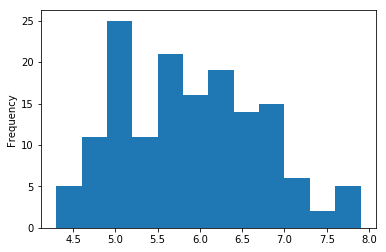

In [3]:
(
    dataframe['sepal length (cm)']
    .plot
    .hist(bins=12)
)

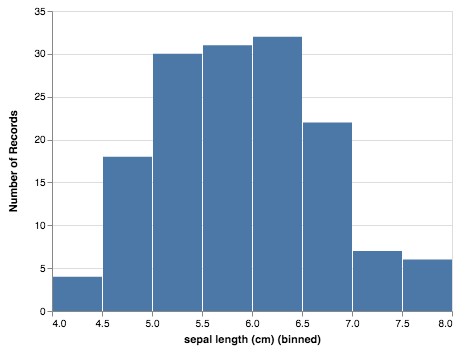

In [4]:
alt.Chart(dataframe).mark_bar().encode(
    alt.X("sepal length (cm):Q", bin=True),
    y='count()',
)

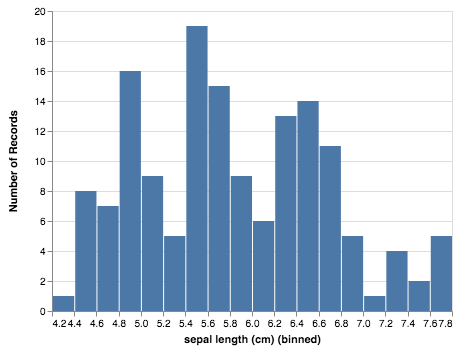

In [5]:
alt.Chart(dataframe).mark_bar().encode(
    alt.X("sepal length (cm):Q", bin=alt.BinParams(maxbins=18)),
    y='count()',
)

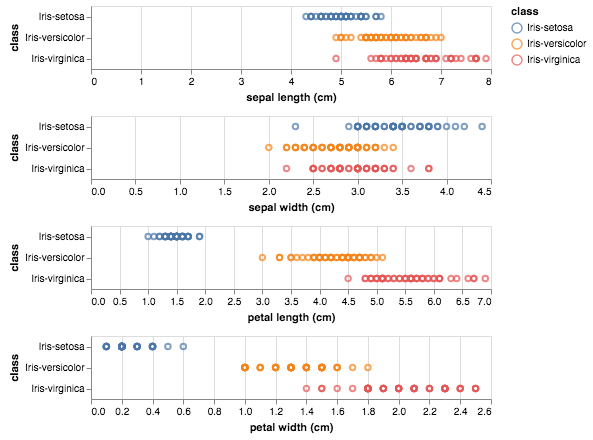

In [6]:
headers = list(dataframe)
field_headers = headers[0:-1]
target = headers[-1]

def make_chart (df, header, target):
    return alt.Chart(df).mark_point().encode(
        x=header,
        y=target,
        color=target
    ).interactive()

charts = map(lambda x: make_chart(dataframe, x, target), field_headers)
reduce((lambda x, y: alt.vconcat(x, y)), charts)

[Text(0,0.5,'sepal width (cm)'),
 Text(0.5,0,'sepal length (cm)'),
 Text(0.5,1,'sepal length and width')]

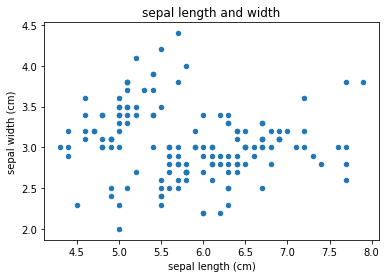

In [7]:
(
    dataframe
    .plot
    .scatter(x='sepal length (cm)', y='sepal width (cm)')
    .set(title='sepal length and width', xlabel='sepal length (cm)', ylabel='sepal width (cm)')
)

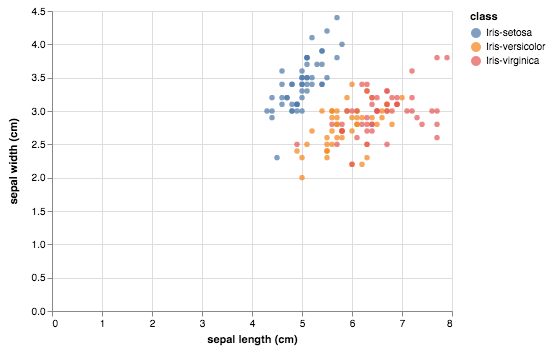

In [8]:
alt.Chart(dataframe).mark_circle().encode(
    x='sepal length (cm)',
    y='sepal width (cm)',
    color='class'
).interactive()

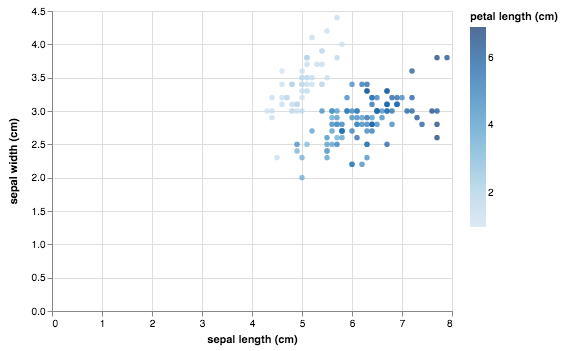

In [9]:
alt.Chart(dataframe).mark_circle().encode(
    x='sepal length (cm)',
    y='sepal width (cm)',
    color='petal length (cm)'
).interactive()

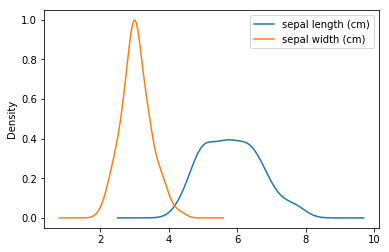

In [10]:
dataframe[['sepal length (cm)', 'sepal width (cm)']].plot.kde()